# Import Library

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0,DenseNet121,MobileNetV2,EfficientNetV2S
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
SEED_VALUE = 1234
np.random.seed(SEED_VALUE)
import random
random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
from keras.metrics import AUC
from keras.layers import Input, Dense
from keras.models import Sequential


# Import Data

In [207]:
df = pd.read_csv("C:/UTS DL/Bank_Loan_Granting.csv")

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


#### Data Legend
ID : customer ID

Age : age of customer

Experience : the number of years that the customer has experience

Income : the customer's annual earnings

ZIP Code : the postal code of the customer's location

Family : the number of people in the customer's family

CCAvg : the average monthly credit card spending

Education : the level of customer's Education(undergraduate,graduate,professional)

Mortgage : the Value of the customer's mortgage(the thing that the customer uses as a guarantee to the bank) 

Securities Account : whether the customer has a security account or not(it's also known as an investment account)

CD Account : the customer has a CD account or not(a type of savings account that lets the customer earn interest on a fixed amount of money for a fixed period)

Online : the customer uses the bank's online services or not

CreditCard : the customer uses the bank's credit card or not

Personal Loan : the customer is granted loans or not

# 1A. Preprocessing


#### Drop Kolom

In [208]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [209]:
df.drop(columns = ['ID', 'ZIP Code'],inplace=True)
df.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1/60,1,0,0,1,0,0,0
1,45,19,34,3,1/50,1,0,0,1,0,0,0


**Kolom "ID" dan "ZIP Code" ini di drop karena tidak mengandung informasi yang relevan untuk analisisnya** 

#### Data Types

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 5000 non-null   int64 
 1   Experience          5000 non-null   int64 
 2   Income              5000 non-null   int64 
 3   Family              5000 non-null   int64 
 4   CCAvg               5000 non-null   object
 5   Education           5000 non-null   int64 
 6   Mortgage            5000 non-null   int64 
 7   Personal Loan       5000 non-null   int64 
 8   Securities Account  5000 non-null   int64 
 9   CD Account          5000 non-null   int64 
 10  Online              5000 non-null   int64 
 11  CreditCard          5000 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 468.9+ KB


In [211]:
unique_values = df['CCAvg'].unique()
unique_values

array(['1/60', '1/50', '1/00', '2/70', '0/40', '0/30', '0/60', '8/90',
       '2/40', '0/10', '3/80', '2/50', '2/00', '4/70', '8/10', '0/50',
       '0/90', '1/20', '0/70', '3/90', '0/20', '2/20', '3/30', '1/80',
       '2/90', '1/40', '5/00', '2/30', '1/10', '5/70', '4/50', '2/10',
       '8/00', '1/70', '0/00', '2/80', '3/50', '4/00', '2/60', '1/30',
       '5/60', '5/20', '3/00', '4/60', '3/60', '7/20', '1/75', '7/40',
       '2/67', '7/50', '6/50', '7/80', '7/90', '4/10', '1/90', '4/30',
       '6/80', '5/10', '3/10', '0/80', '3/70', '6/20', '0/75', '2/33',
       '4/90', '0/67', '3/20', '5/50', '6/90', '4/33', '7/30', '4/20',
       '4/40', '6/10', '6/33', '6/60', '5/30', '3/40', '7/00', '6/30',
       '8/30', '6/00', '1/67', '8/60', '7/60', '6/40', '10/00', '5/90',
       '5/40', '8/80', '1/33', '9/00', '6/70', '4/25', '6/67', '5/80',
       '4/80', '3/25', '5/67', '8/50', '4/75', '4/67', '3/67', '8/20',
       '3/33', '5/33', '9/30', '2/75'], dtype=object)

In [212]:
def conversion(value):
    try:
        x, y = value.split('/')
        return float(x) / float(y)
    except:
        return None

df['CCAvg'] = df['CCAvg'].apply(conversion)
df['CCAvg'].fillna(0, inplace=True)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,0.016667,1,0,0,1,0,0,0
1,45,19,34,3,0.020000,1,0,0,1,0,0,0
2,39,15,11,1,0.000000,1,0,0,0,0,0,0
3,35,9,100,1,0.028571,2,0,0,0,0,0,0
4,35,8,45,4,0.000000,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,0.011111,3,0,0,0,0,1,0
4996,30,4,15,4,0.000000,1,85,0,0,0,1,0
4997,63,39,24,2,0.000000,3,0,0,0,0,0,0
4998,65,40,49,3,0.000000,2,0,0,0,0,1,0


In [213]:
unique_values = df['CCAvg'].unique()
unique_values

array([0.01666667, 0.02      , 0.        , 0.02857143, 0.08888889,
       0.05      , 0.0375    , 0.04      , 0.05714286, 0.8       ,
       0.03333333, 0.1       , 0.0125    , 0.02222222, 0.025     ,
       0.06666667, 0.07142857, 0.08      , 0.2       , 0.01428571,
       0.06      , 0.08333333, 0.25      , 0.35      , 0.01333333,
       0.175     , 0.02985075, 0.14      , 0.12      , 0.0875    ,
       0.07777778, 0.4       , 0.01111111, 0.13333333, 0.075     ,
       0.5       , 0.3       , 0.04285714, 0.06060606, 0.04444444,
       0.15      , 0.12121212, 0.23333333, 0.6       , 0.18181818,
       0.16666667, 0.26666667, 0.01492537, 0.11666667, 0.05555556,
       0.125     , 0.03030303, 0.08571429, 0.16      , 0.08955224,
       0.0625    , 0.07462687, 0.05333333, 0.05970149, 0.04477612,
       0.09090909, 0.15151515, 0.02666667])

**Saat saya mengecek data types, ada 1 kolom yang bukan numerik melainkan object yaitu kolom "CCAvg". Setelah ditelusuri lebih lanjut ternyata itu merupakan object karena masih dalam bentuk pecahan, sehingga saya memutuskan untuk mengubahnya menjadi desimal, dan kalau ada yang pembaginya 0 sehingga mengakibatkan missing value, saya jadikan 0 sehingga tidak ada missing value. Setelah dicek ulang setelah perubahannya, terlihat bahwa hasilnya sudah desimal semua yang menunjukan bahwa perubahannya berhasil**


#### Missing Value Check

In [214]:
missing = df.isna().sum()

print("Number of Missing Values:")
print(missing)

Number of Missing Values:
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


**Berdasarkan hasil pengecekan tersebut, dapat diketahui sudah tidak ada missing value**

#### Unique Value Check

In [215]:
for column in df.columns:
    unique = df[column].unique()
    print("Column", column, ":", unique)
    print('')

Column Age : [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]

Column Experience : [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

Column Income : [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]

Column F

**Saat dilakukan pengecekan unique value, ada anomali yang saya temukan yaitu pada kolom 'Experience' terdapat bilangan negatif yang tidak masuk akal jika dimasukan pada konteks 'Experience' karena pengalaman tidak akan pernah bisa negatif**

#### Turn negative to positive

In [216]:
df['Experience'] = df['Experience'].abs()
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

**Karena adanya kemunculan bilangan bilangan negatif pada kolom 'Experience', saya memuutuskan untuk merubahnya dengan cara diabsolutekan sehingga tidak ada lagi value yang negatif**

#### Check Duplicate Value

In [217]:
duplikat = df.duplicated().sum()

print("Duplicate Data:", duplikat)

Duplicate Data: 15


In [219]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
125,60,35,80,3,0.000000,1,0,0,0,0,1,0
218,44,20,72,3,0.000000,3,0,0,0,0,1,0
590,29,3,39,4,0.200000,3,0,0,0,0,1,0
738,36,10,80,4,0.100000,2,0,0,0,0,1,0
789,29,3,31,4,0.000000,2,0,0,0,0,1,0
799,29,3,39,4,0.200000,3,0,0,0,0,1,0
930,28,4,43,3,0.000000,2,0,0,0,0,1,0
1026,28,4,43,3,0.000000,2,0,0,0,0,1,0
1096,43,18,29,1,0.000000,3,0,0,0,0,1,0
1526,36,10,80,4,0.100000,2,0,0,0,0,1,0


In [220]:
df = df.drop_duplicates()

In [221]:
duplikat = df.duplicated().sum()

print("Num of Duplicate Data:", duplikat)

Num of Duplicate Data: 0


**Berdasarkan hasil pengecekan saya terhadap value duplikat, saya mendapatkan ada sebanyak 15 duplicate data, kemudian setelah saya drop dan saya cek lagi hasilnya sudah menjadi 0 yang berarti drop terhadap data duplikat berhasil**

# 1B. Exploratory Data Analysis & Data Splitting

#### Exploratory Data Analysis

In [222]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000
mean,45.348445,20.145236,73.842327,2.397192,0.038132,1.878837,56.668806,0.096289,0.104714,0.060582,0.595988,0.294684
std,11.463073,11.414196,46.063407,1.147399,0.075888,0.839535,101.819440,0.295017,0.306215,0.238585,0.490749,0.455946
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,0.012500,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,0.040000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,0.800000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Dari hasil df.describe kita bisa mendapatkan berbagai statstik yang nantinya akan dapat berguna nantinya untuk analisis kita**

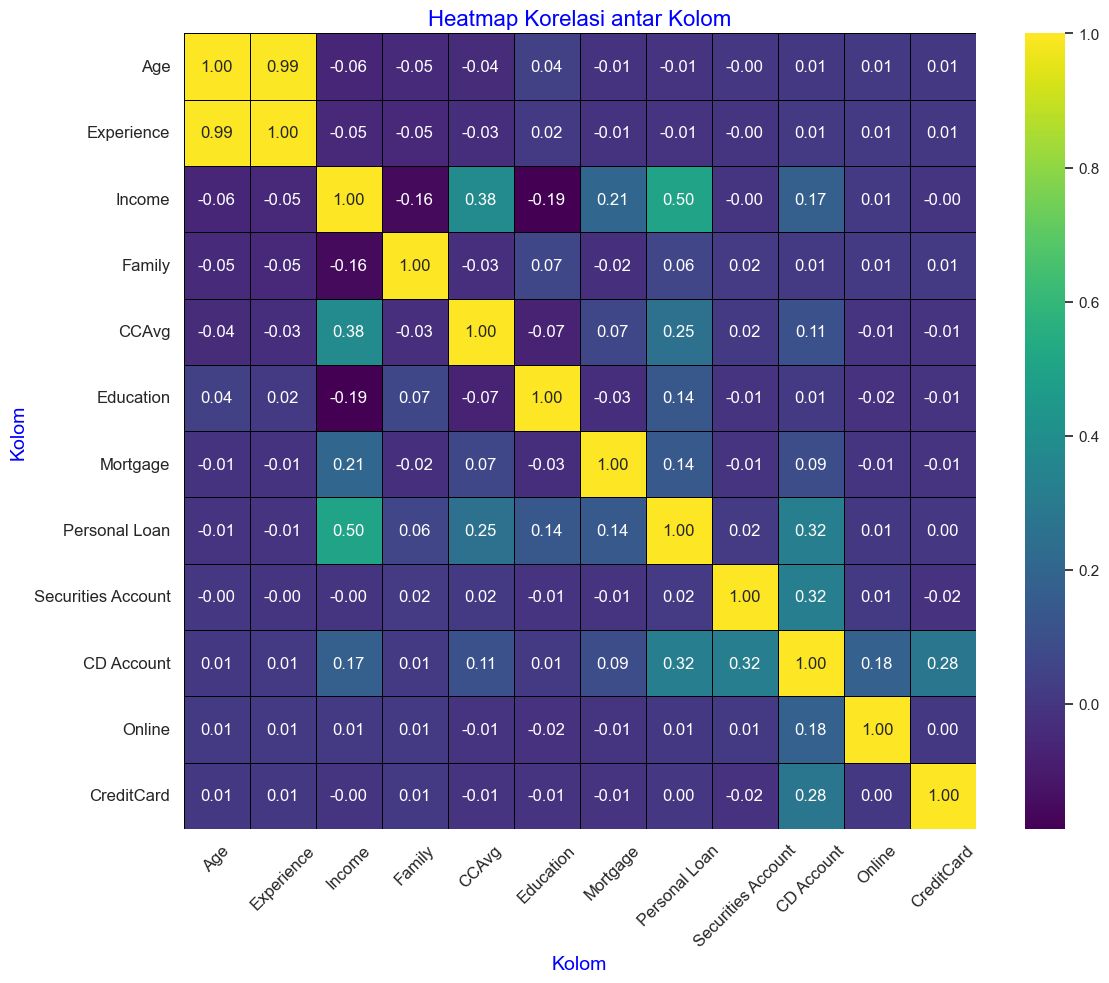

In [223]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, linecolor='black')
plt.title('Heatmap Korelasi antar Kolom', fontsize=16, color='blue')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('Kolom', fontsize=14, color='blue') 
plt.ylabel('Kolom', fontsize=14, color='blue')
plt.tight_layout() 
plt.show()

**Heatmap tersebut menggambarkan korelasi yang ada di antara kolom, dapat disimpulkan bahwa yang paling bagus korelasinya diantara kolom adalah antara kolom Age dan Experience yang memiliki korelasi sebanyak 0.99 dimana merupakan angka yang cukup bagus. Selain itu, masih ada juga beberapa hubungan antar kolom dengan korelasi yang bagus. Heatmap ini akan membantu untuk memberikan insight bagi saya dalam analisis kedepannya**

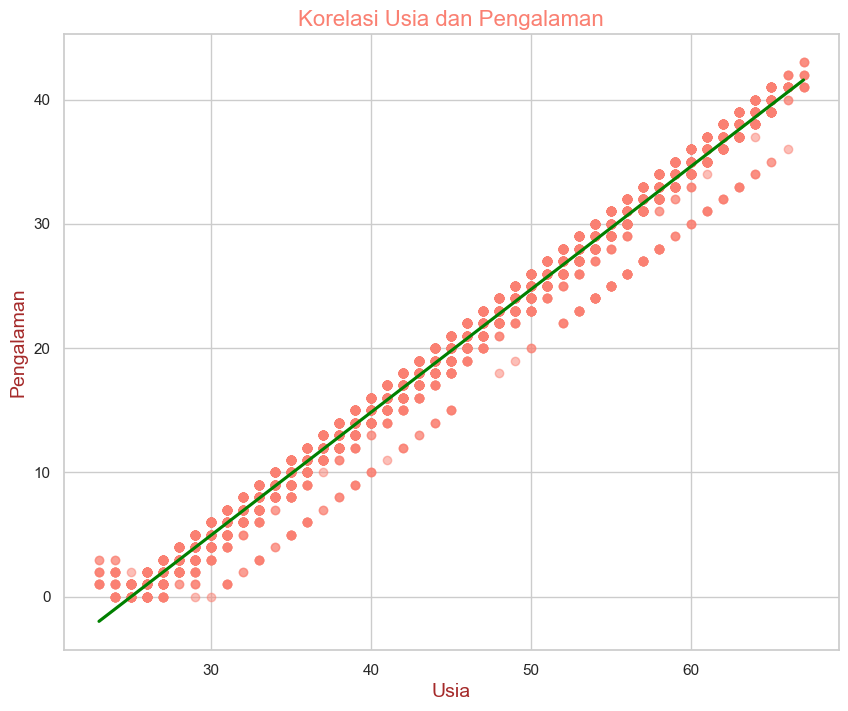

In [224]:
plt.figure(figsize=(10, 8))
sns.regplot(x='Age', y='Experience', data=df, scatter_kws={'color': 'salmon', 'alpha':0.5}, line_kws={'color': 'green'})
plt.title('Korelasi Usia dan Pengalaman', fontsize=16, color='salmon') 
plt.xlabel('Usia', fontsize=14, color='brown')
plt.ylabel('Pengalaman', fontsize=14, color='brown') 
plt.grid(True) 
plt.show()

__Berdasarkan scatter plot tersebut, ketika kita melihat bahwa titik-titik pada scatter plot membentuk pola diagonal yang naik ke kanan, hal ini menunjukkan bahwa ada korelasi positif antara usia dan pengalaman. Dengan kata lain, seiring bertambahnya usia, pengalaman seseorang juga cenderung bertambah. Kesimpulan ini mendukung hasil analisis sebelumnya yang ditunjukkan oleh heatmap, yang menunjukkan korelasi positif antara usia dan pengalaman. Oleh karena itu, dapat disimpulkan bahwa analisis korelasi tersebut valid, dan pola yang diamati dalam scatter plot memberikan dukungan tambahan terhadap kesimpulan tersebut.__

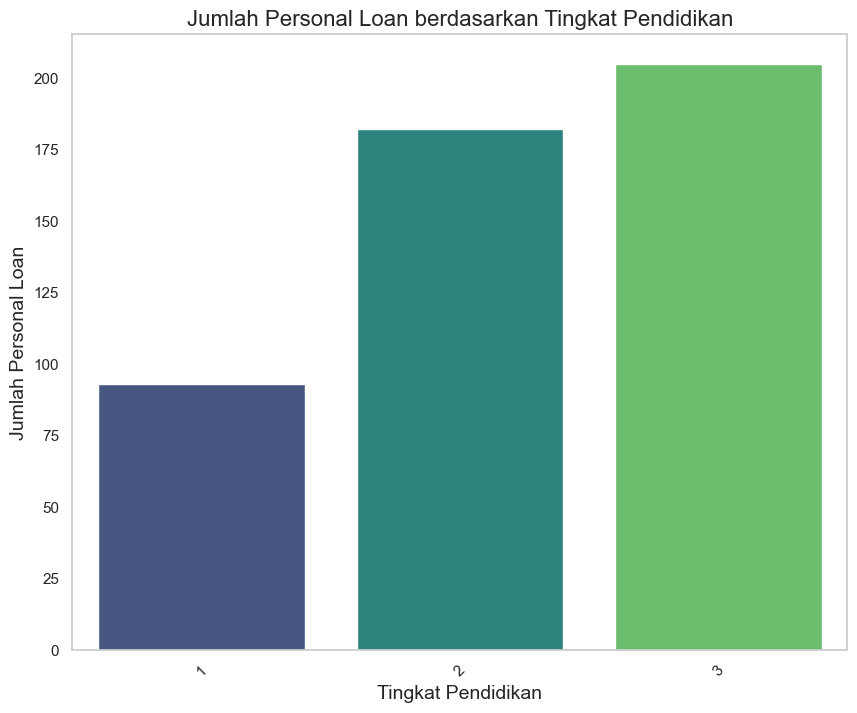

In [225]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Education', y='Personal Loan', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Jumlah Personal Loan berdasarkan Tingkat Pendidikan', fontsize=16)
plt.xlabel('Tingkat Pendidikan', fontsize=14)
plt.ylabel('Jumlah Personal Loan', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False) 
plt.show()

**Pola pada chart menunjukkan bahwa terdapat korelasi positif antara tingkat pendidikan dan jumlah orang yang memiliki Personal Loan. Semakin tinggi tingkat pendidikan seseorang, semakin besar kemungkinan mereka memiliki Personal Loan. Ini mungkin disebabkan oleh faktor seperti kemampuan keuangan yang lebih baik, akses informasi yang lebih luas, serta kebutuhan finansial yang lebih besar untuk investasi dalam pendidikan. Oleh karena itu, dapat disimpulkan bahwa tingkat pendidikan berpotensi memengaruhi keputusan seseorang untuk memiliki Personal Loan.**

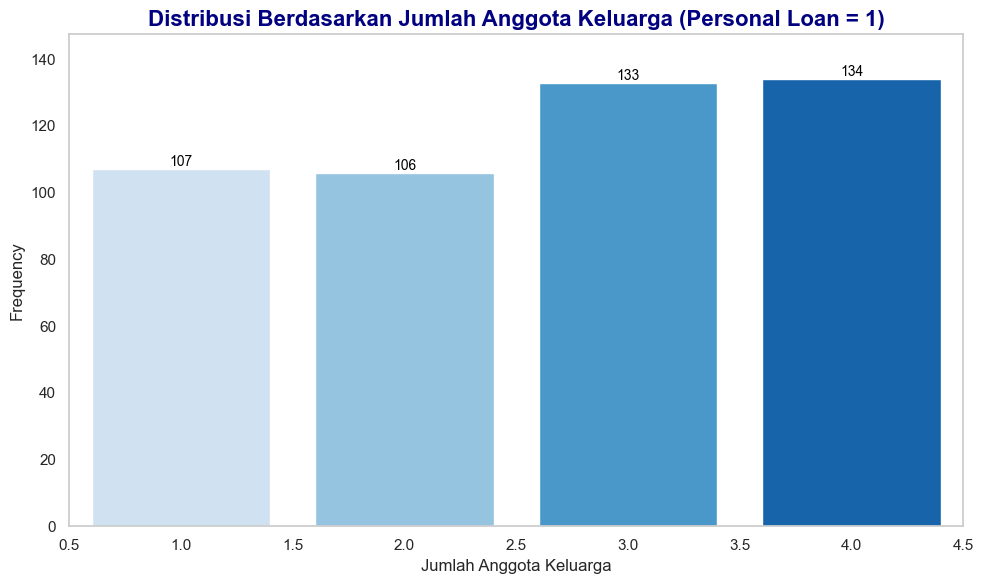

In [226]:
personal_loan_users = df[df['Personal Loan'] == 1]

family_distribution = personal_loan_users['Family'].value_counts().sort_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bars = plt.bar(family_distribution.index, family_distribution.values, color=sns.color_palette("Blues", len(family_distribution)))

plt.title('Distribusi Berdasarkan Jumlah Anggota Keluarga (Personal Loan = 1)', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Jumlah Anggota Keluarga', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.xlim(0.5, len(family_distribution) + 0.5)
plt.ylim(0, max(family_distribution.values) * 1.1)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.grid(False)
plt.show()


**Pola pada chart menunjukkan adanya korelasi positif antara jumlah anggota keluarga dan jumlah keluarga yang memiliki Personal Loan. Semakin banyak anggota keluarga, semakin besar kemungkinan keluarga tersebut memiliki Personal Loan. Hal ini mungkin disebabkan oleh kebutuhan finansial yang lebih besar dan skala pengeluaran yang lebih tinggi dalam keluarga yang lebih besar, membuat Personal Loan menjadi pilihan yang lebih umum.**

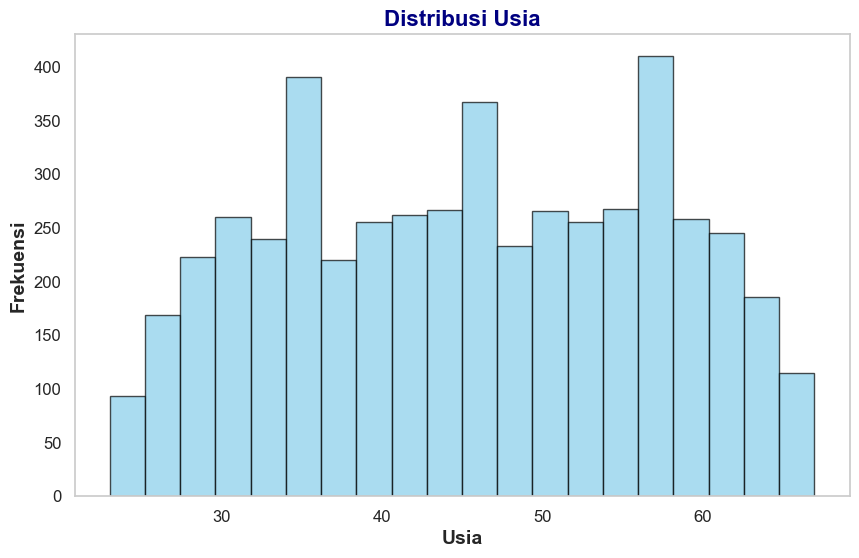

In [227]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)  # Menggunakan 20 bins untuk lebih detail
plt.title('Distribusi Usia', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Usia', fontsize=14, fontweight='bold')
plt.ylabel('Frekuensi', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.grid(False) 
plt.show()

**Pola yang terlihat pada histogram kolom Usia menunjukkan bahwa data pada kolom tersebut berdistribusi normal. Distribusi normal menandakan bahwa nilai-nilai usia tersebar secara merata di sekitar nilai rata-rata, tanpa adanya kelompok usia tertentu yang secara signifikan lebih umum atau lebih jarang daripada yang lain. Ini mengindikasikan bahwa tidak ada tren atau pola yang mencolok dalam distribusi usia, dan variasi usia di antara individu cenderung seimbang.**

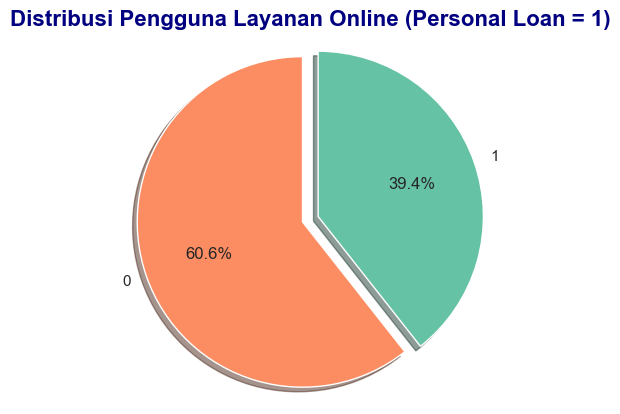

In [228]:
personal_loan_users = df[df['Personal Loan'] == 1]
online_users = personal_loan_users['Online'].value_counts()

colors = ['#fc8d62', '#66c2a5']
explode = (0, 0.1)  
labels = ['0', '1']

plt.pie(online_users, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
plt.axis('equal')
plt.title('Distribusi Pengguna Layanan Online (Personal Loan = 1)', fontsize=16, fontweight='bold', color='navy')
plt.show()


**Berdasarkan hasil pada pie chart, terlihat bahwa mayoritas orang yang memiliki Personal Loan tidak pernah menggunakan layanan online. Hal ini dapat diinterpretasikan dari proporsi besar bagian "0" pada pie chart, yang mewakili jumlah orang yang memiliki Personal Loan namun tidak menggunakan layanan online. Kesimpulan ini menunjukkan adanya perbedaan perilaku penggunaan layanan online antara orang-orang yang memiliki Personal Loan dan yang tidak.**

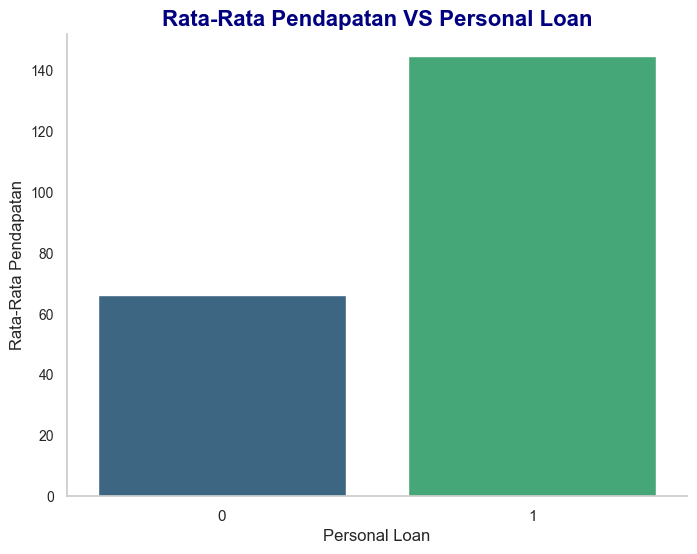

In [229]:
income_avg_by_loan = df.groupby('Personal Loan')['Income'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='Personal Loan', y='Income', data=income_avg_by_loan, palette='viridis')
plt.title('Rata-Rata Pendapatan VS Personal Loan', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Personal Loan', fontsize=12)
plt.ylabel('Rata-Rata Pendapatan', fontsize=12)
plt.xticks([0, 1], ['0', '1']) 
plt.yticks(fontsize=10) 
sns.despine()  
plt.grid(False)
plt.show()

**Berdasarkan hasil dari bar chart, terlihat bahwa orang yang memiliki Personal Loan cenderung memiliki rata-rata pendapatan yang lebih tinggi dibandingkan dengan mereka yang tidak memiliki Personal Loan. Selain itu, korelasi antara kedua kolom tersebut cukup tinggi, mencapai 0.50. Hal ini mengindikasikan adanya hubungan positif antara pendapatan dan kepemilikan Personal Loan. Dengan demikian, dapat disimpulkan bahwa chart tersebut membantu memvalidasi adanya hubungan yang signifikan antara kedua variabel tersebut.**

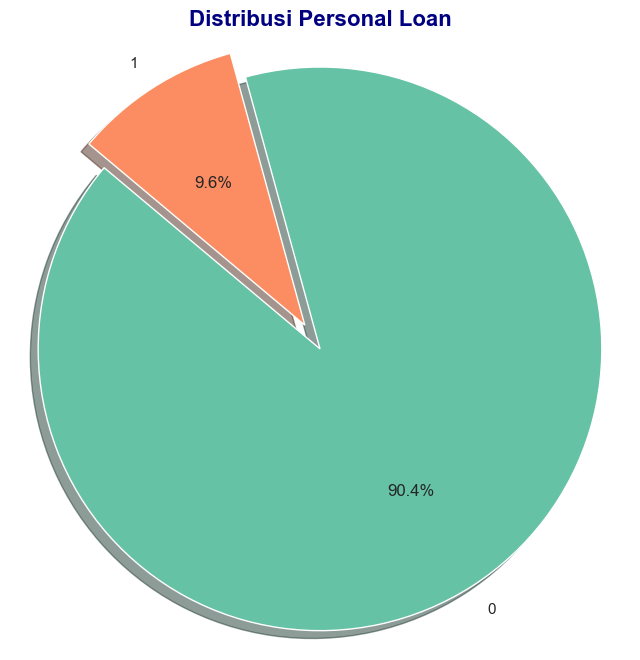

In [230]:
personal_loan_distribution = df['Personal Loan'].value_counts()

colors = ['#66c2a5', '#fc8d62']

explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(personal_loan_distribution, labels=personal_loan_distribution.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode, shadow=True)
plt.title('Distribusi Personal Loan', fontsize=16, fontweight='bold', color='navy')
plt.axis('equal')  
plt.show()

**Dari hasil Pie Chart, terlihat bahwa proporsi jumlah personal loan dalam dataset relatif kecil, hanya sebesar 9.6%. Hal ini menunjukkan ketidakseimbangan (imbalance) antara jumlah data yang memiliki personal loan dengan yang tidak memiliki. Proporsi kecil ini menandakan bahwa data yang memiliki personal loan hanya merupakan sebagian kecil dari keseluruhan dataset, sementara mayoritas data tidak memiliki personal loan. Oleh karena itu, dapat disimpulkan bahwa dataset ini mengalami ketidakseimbangan dalam hal kepemilikan personal loan.**

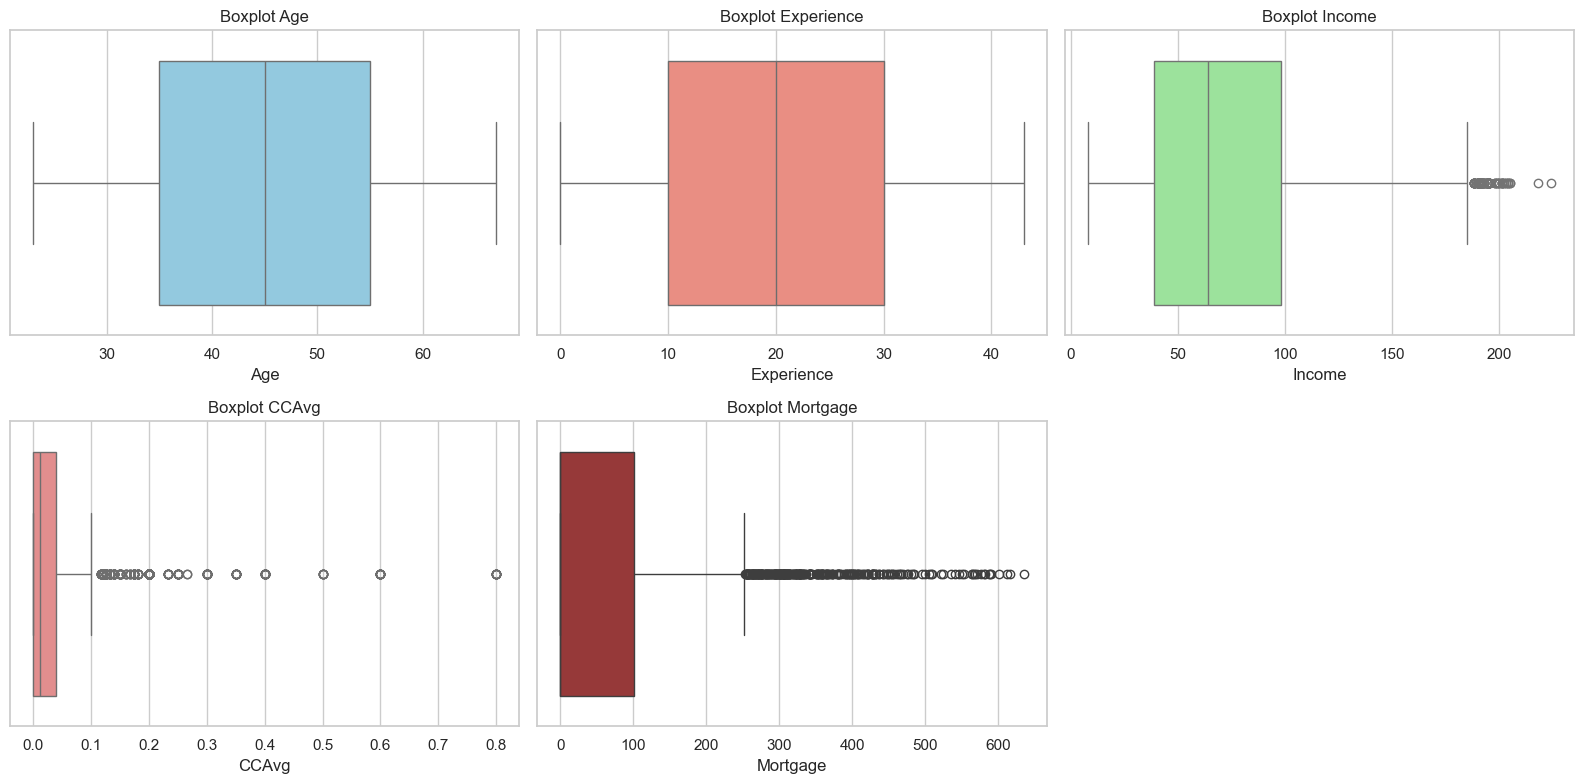

In [231]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['Age'], color='skyblue')
plt.title('Boxplot Age')

plt.subplot(2, 3, 2)
sns.boxplot(x=df['Experience'], color='salmon')
plt.title('Boxplot Experience')

plt.subplot(2, 3, 3)
sns.boxplot(x=df['Income'], color='lightgreen')
plt.title('Boxplot Income')

plt.subplot(2, 3, 4)
sns.boxplot(x=df['CCAvg'], color='lightcoral')
plt.title('Boxplot CCAvg')

plt.subplot(2, 3, 5)
sns.boxplot(x=df['Mortgage'], color='brown')
plt.title('Boxplot Mortgage')

plt.tight_layout()
plt.show()

**Dari Boxplot yang dibuat untuk kolom-kolom dengan nilai non-binari dan memiliki banyak unique value, terlihat bahwa kolom Mortgage, CCAvg, dan Income memiliki outliers. Outliers ini menunjukkan adanya nilai-nilai yang jauh dari kisaran nilai yang umum dalam kolom tersebut. Hal ini mengindikasikan adanya variasi yang signifikan dalam data, di mana sebagian kecil dari observasi memiliki nilai yang ekstrem atau tidak biasa dalam konteks kolom tersebut. Oleh karena itu, ketiga kolom tersebut perlu diperhatikan lebih lanjut dalam analisis data untuk memahami karakteristik dan potensi dampaknya terhadap hasil analisis.**

#### Data Splitting

In [232]:
from sklearn.model_selection import train_test_split

#spliting dataset
X = df.drop(columns="Personal Loan")
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test, test_size=0.5,random_state=42)

#80% training set
print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
#10% testing set
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")
#10% Validation set
print(f"X_val : {X_val.shape}")
print(f"y_val : {y_val.shape}")

X_train : (3988, 11)
y_train : (3988,)
X_test : (498, 11)
y_test : (498,)
X_val : (499, 11)
y_val : (499,)


**Dari hasil splitting tersebut didapatkan 80% train, 10% test, dan 10% validation**

In [233]:
y_train.value_counts()

Personal Loan
0    3604
1     384
Name: count, dtype: int64

In [234]:
y_test.value_counts()

Personal Loan
0    452
1     46
Name: count, dtype: int64

In [235]:
y_val.value_counts()

Personal Loan
0    449
1     50
Name: count, dtype: int64

# 1C. Challenges & Difficulty

In [236]:
def calculate_outlier_percentage(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    outlier_percentage = (len(outliers) / len(column)) * 100
    
    return outlier_percentage

outlier_percentages = {}
for column in df.columns:
    if df[column].dtype != 'object' and df[column].nunique() > 4:
        outlier_percentages[column] = calculate_outlier_percentage(df[column])

for column, percentage in outlier_percentages.items():
    print(f"Persentase outliers dalam kolom '{column}': {percentage:.2f}%")

Persentase outliers dalam kolom 'Age': 0.00%
Persentase outliers dalam kolom 'Experience': 0.00%
Persentase outliers dalam kolom 'Income': 1.93%
Persentase outliers dalam kolom 'CCAvg': 7.98%
Persentase outliers dalam kolom 'Mortgage': 5.84%


**Saat melakukan tahapan pre-processing data, saya menghadapi beberapa tantangan yang perlu diperbaiki. Pertama, saya menemukan adanya duplicate data, nilai yang tidak sesuai dengan kolomnya, kolom yang masih dalam bentuk Object data type, serta beberapa kolom yang tidak relevan. Untuk mengatasi tantangan ini, saya menggunakan berbagai metode yang sesuai, seperti penghapusan baris duplikat dan penghapusan kolom yang tidak relevan seperti "ID" dan "ZIP Code".**

**Selanjutnya, saat mengecek tipe data, saya menemukan bahwa kolom "CCAvg" masih dalam format object karena masih berupa pecahan. Saya berhasil mengubahnya menjadi tipe data desimal dan menangani nilai pembagi 0 dengan menggantinya menjadi 0 untuk menghindari missing value. Hasilnya, semua nilai pada kolom tersebut telah menjadi desimal.**

**Selama pemeriksaan unique value, saya menemukan bahwa kolom "Experience" mengandung nilai negatif yang tidak masuk akal. Dalam konteks "Experience", nilai negatif tidak mungkin terjadi karena pengalaman tidak dapat bernilai kurang dari nol. Untuk menangani anomali ini, saya memutuskan untuk melakukan koreksi pada nilai-nilai negatif tersebut. Salah satu pendekatan yang saya lakukan adalah dengan mengubah nilai negatif menjadi nilai positif dengan mengambil nilai absolutnya. Dengan demikian, data pada kolom "Experience" menjadi lebih konsisten dan dapat dipertimbangkan secara tepat dalam analisis selanjutnya.**

**Terakhir, setelah mengecek outliers pada kolom dengan unique value yang banyak, seperti Income, CCAvg, dan Mortgage, saya memutuskan untuk tidak melakukan proses apapun terhadap outliers tersebut. Saya mengambil keputusan ini karena menghapus outliers dapat mengakibatkan kehilangan jumlah data yang cukup signifikan, sementara imputasi dengan menggunakan nilai statistik seperti mean, modus, atau median dapat membuat data menjadi tidak valid. Dengan mempertahankan nilai outliers, saya yakin model akan dilatih dengan lebih baik dan menjadi lebih robust dalam menghadapi outliers.**

In [237]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Jumlah unique value untuk kolom '{column}': {unique_values}")

Jumlah unique value untuk kolom 'Age': 45
Jumlah unique value untuk kolom 'Experience': 44
Jumlah unique value untuk kolom 'Income': 162
Jumlah unique value untuk kolom 'Family': 4
Jumlah unique value untuk kolom 'CCAvg': 63
Jumlah unique value untuk kolom 'Education': 3
Jumlah unique value untuk kolom 'Mortgage': 347
Jumlah unique value untuk kolom 'Personal Loan': 2
Jumlah unique value untuk kolom 'Securities Account': 2
Jumlah unique value untuk kolom 'CD Account': 2
Jumlah unique value untuk kolom 'Online': 2
Jumlah unique value untuk kolom 'CreditCard': 2


In [238]:
min_values = df.min()
max_values = df.max()

for column in df.columns:
    print(f"Kolom '{column}':")
    print(f"  Nilai Minimum: {min_values[column]}")
    print(f"  Nilai Maksimum: {max_values[column]}")
    print()


Kolom 'Age':
  Nilai Minimum: 23.0
  Nilai Maksimum: 67.0

Kolom 'Experience':
  Nilai Minimum: 0.0
  Nilai Maksimum: 43.0

Kolom 'Income':
  Nilai Minimum: 8.0
  Nilai Maksimum: 224.0

Kolom 'Family':
  Nilai Minimum: 1.0
  Nilai Maksimum: 4.0

Kolom 'CCAvg':
  Nilai Minimum: 0.0
  Nilai Maksimum: 0.8

Kolom 'Education':
  Nilai Minimum: 1.0
  Nilai Maksimum: 3.0

Kolom 'Mortgage':
  Nilai Minimum: 0.0
  Nilai Maksimum: 635.0

Kolom 'Personal Loan':
  Nilai Minimum: 0.0
  Nilai Maksimum: 1.0

Kolom 'Securities Account':
  Nilai Minimum: 0.0
  Nilai Maksimum: 1.0

Kolom 'CD Account':
  Nilai Minimum: 0.0
  Nilai Maksimum: 1.0

Kolom 'Online':
  Nilai Minimum: 0.0
  Nilai Maksimum: 1.0

Kolom 'CreditCard':
  Nilai Minimum: 0.0
  Nilai Maksimum: 1.0



In [239]:
from sklearn.preprocessing import RobustScaler, StandardScaler

robust_scaler = RobustScaler()

standard_scaler = StandardScaler()

columns_to_robust_scale = ['Income', 'Mortgage']

columns_to_standard_scale = ['Age', 'Experience']

X_train[columns_to_robust_scale] = robust_scaler.fit_transform(X_train[columns_to_robust_scale])
X_train[columns_to_standard_scale] = standard_scaler.fit_transform(X_train[columns_to_standard_scale])

X_test[columns_to_robust_scale] = robust_scaler.transform(X_test[columns_to_robust_scale])
X_test[columns_to_standard_scale] = standard_scaler.transform(X_test[columns_to_standard_scale])

X_val[columns_to_robust_scale] = robust_scaler.transform(X_val[columns_to_robust_scale])
X_val[columns_to_standard_scale] = standard_scaler.transform(X_val[columns_to_standard_scale])


In [240]:
X_val.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4692,1.177916,1.286863,-0.525424,3,0.0000,2,0.000000,0,0,0,1
3484,-0.042425,-0.199586,-0.169492,3,0.0400,2,1.108911,0,0,0,0
757,0.567745,0.674796,0.305085,3,0.0125,2,0.000000,1,0,0,0
1168,1.439418,1.461739,-0.423729,1,0.1000,3,0.000000,0,0,1,0
3712,0.393411,0.412481,0.830508,1,0.0000,1,0.000000,0,0,0,0


In [241]:
X_train.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4712,-1.785770,-1.773473,-0.830508,2,0.000000,3,0.000000,0,0,0,1
3902,-0.042425,0.062728,-0.406780,2,0.200000,3,0.000000,0,0,0,1
4472,0.393411,0.412481,0.457627,1,0.025000,2,0.000000,0,0,1,0
3888,-0.042425,-0.199586,0.305085,3,0.029851,2,2.485149,0,0,1,1
3161,-1.524268,-1.423721,0.423729,1,0.125000,1,0.000000,0,0,1,0


In [242]:
X_test.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2203,0.393411,0.412481,1.135593,1,0.00,1,3.079208,0,0,0,0
2193,-0.042425,-0.112148,-0.644068,2,0.00,3,1.009901,0,0,1,0
3230,1.700919,1.724054,-0.254237,3,0.05,1,0.000000,0,0,0,1
3521,-0.826930,-0.899092,-0.559322,2,0.00,3,0.000000,0,0,1,0
181,-0.826930,-0.724215,-0.898305,4,0.00,2,0.801980,0,0,0,0


**Dengan mempertimbangkan karakteristik data dan kebutuhan analisis, saya memutuskan untuk tidak melakukan feature encoding karena data pada dataset ini sudah dalam bentuk numerik hanya perlu mengubah yang kolom CCAvg menjadi desimal. Setelah mengamati banyaknya unique values dan rentang nilai min-max, saya mengidentifikasi 4 kolom dengan rentang nilai yang perlu di-scaling, yaitu income, mortgage, age, dan experience. Untuk menangani outliers, saya menggunakan Robust Scaler pada kolom income dan mortgage, sementara untuk kolom age dan experience yang tidak memiliki outliers, saya menggunakan Standard Scaler. Scaling dilakukan terhadap setiap set data (train, test, dan val) yang telah saya bagi sebelumnya. Dari hasilnya, terlihat bahwa data sudah terscale dengan baik**

In [243]:
personal_loan= y_train.value_counts()
personal_loan

Personal Loan
0    3604
1     384
Name: count, dtype: int64

In [244]:
'''
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)
'''

'\nfrom imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state=42)\n\nX_train, y_train = smote.fit_resample(X_train, y_train)\n'

**Dari analisis diatas, terlihat bahwa data di kolom personal loan terdapat permasalahan imbalance, permasalahan ini sebelumnya juga sudah tergambar di pie chart pada nomor 1b. Untuk mencoba memperbaikinya saya mencoba OverSampling menggunakan SMOTE. Namun setelah saya mencoba run ulang model saya, terlihat bahwa dengan menggunakan komposisi data yang baru, performance model saya berkurang, sehingga saya tidak jadi menggunakan OverSampling dengan SMOTE (Gambar pertama tanpa SMOTE, gambar kedua dengan SMOTE).**
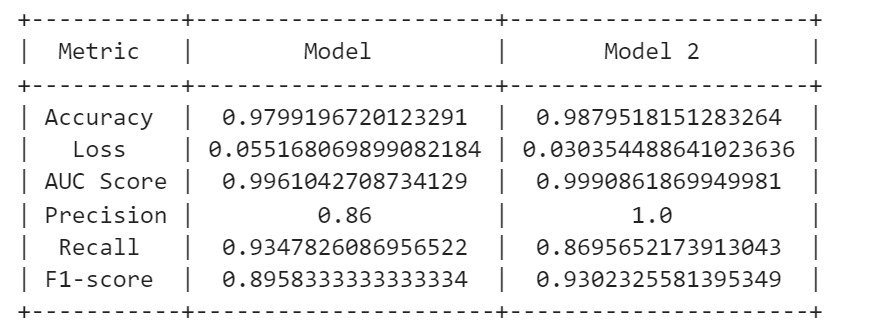
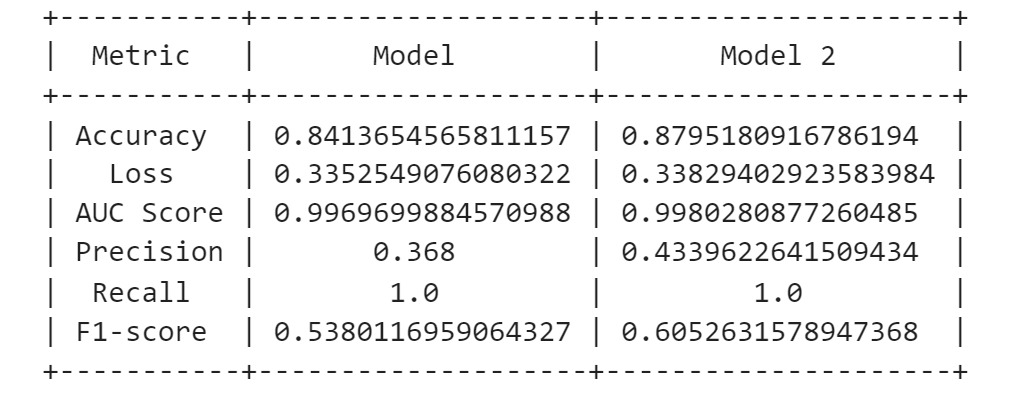

# 1D. Baseline Architecture

In [245]:
import tensorflow as tf
tf.random.set_seed(42)
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(80).shuffle(10)
test_ds = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(80).shuffle(10)
val_ds = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(80).shuffle(10)

In [246]:
model = Sequential()

model.add(Dense(22, activation='relu', input_shape=(11,)))

model.add(Dense(22, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 22)                264       
                                                                 
 dense_40 (Dense)            (None, 22)                506       
                                                                 
 dense_41 (Dense)            (None, 1)                 23        
                                                                 
Total params: 793
Trainable params: 793
Non-trainable params: 0
_________________________________________________________________


In [247]:
import time
start_time = time.time()

loss = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=50)

end_time = time.time()
runtime = end_time - start_time
print("Runtime: {:.4f} sekon".format(runtime))

Epoch 1/50
50/50 [==============================] - 1s 23ms/step - loss: 0.4295 - accuracy: 0.8994 - auc_7: 0.4512 - val_loss: 0.3459 - val_accuracy: 0.8998 - val_auc_7: 0.4749
Epoch 2/50
50/50 [==============================] - 1s 11ms/step - loss: 0.3064 - accuracy: 0.9042 - auc_7: 0.6733 - val_loss: 0.2868 - val_accuracy: 0.8998 - val_auc_7: 0.7982
Epoch 3/50
50/50 [==============================] - 0s 8ms/step - loss: 0.2526 - accuracy: 0.9035 - auc_7: 0.8590 - val_loss: 0.2482 - val_accuracy: 0.9018 - val_auc_7: 0.8645
Epoch 4/50
50/50 [==============================] - 0s 9ms/step - loss: 0.2197 - accuracy: 0.9107 - auc_7: 0.8989 - val_loss: 0.2215 - val_accuracy: 0.9138 - val_auc_7: 0.8950
Epoch 5/50
50/50 [==============================] - 0s 8ms/step - loss: 0.1933 - accuracy: 0.9265 - auc_7: 0.9239 - val_loss: 0.1922 - val_accuracy: 0.9218 - val_auc_7: 0.9286
Epoch 6/50
50/50 [==============================] - 1s 11ms/step - loss: 0.1707 - accuracy: 0.9378 - auc_7: 0.9416 - v

In [248]:
from sklearn.metrics import roc_auc_score

test_results = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_results[1])
print("Test Loss:", test_results[0])

y_pred = model.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred)

print("AUC Score:", auc_score)

16/16 [==============================] - 0s 12ms/step - loss: 0.0548 - accuracy: 0.9799 - auc_7: 0.9962
Test Accuracy: 0.9799196720123291
Test Loss: 0.054822180420160294
16/16 [==============================] - 0s 3ms/step
AUC Score: 0.9962004617160446


**Dalam pengembangan model awal (base model), saya menggunakan squential dengan input layer untuk menampung 11 input data. Selanjutnya, dilakukan penambahan dua hidden layer, di mana masing-masing memiliki dua kali lipat input. Penambahan ini bertujuan untuk memberikan model ruang yang lebih luas dalam menangkap fitur-fitur yang kompleks dalam data. Selanjutnya, dipilih penggunaan activation function ReLU pada setiap hidden layer. Pemilihan ReLU didasarkan pada keunggulannya dalam mengatasi masalah vanishing gradient dan mempercepat proses training. Output layer hanya memiliki satu node dan menggunakan activation function sigmoid. Sigmoid dipilih karena outputnya berada dalam rentang antara 0 dan 1, yang sesuai dengan sifat masalah klasifikasi biner dan memudahkan interpretasi hasil prediksi. Pada tahap terakhir, jumlah node pada output layer disesuaikan dengan jumlah kelas dalam kasus Loan, yaitu 2 (0 dan 1). Namun, karena ini merupakan masalah Binary Classification, jumlah output dapat menjadi 2 atau 1. Dalam kasus loan prediction, penggunaan satu layer output adalah pilihan yang lebih baik. Fokus pada prediksi biner, di mana kita hanya tertarik untuk mengetahui apakah pinjaman akan disetujui atau ditolak, membuat satu layer output lebih tepat. Dengan menggunakan satu layer output, interpretasi hasil menjadi lebih sederhana dan langsung karena probabilitas kelas positif (disetujui) dihasilkan oleh satu neuron. Selain itu, model dengan satu layer output cenderung memiliki risiko overfitting yang lebih rendah karena kompleksitasnya yang lebih rendah dan jumlah parameter yang perlu dioptimalkan yang lebih sedikit. Hal ini juga membuatnya lebih efisien secara komputasi, mempercepat proses training dan inferensi.**


# 1E. Modificated Model

In [249]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model2 = Sequential()

model2.add(Dense(64, activation='relu', input_shape=(11,)))  
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))  
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])

model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 64)                768       
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_45 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [250]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [251]:
start_time = time.time()

loss2 = model2.fit(train_ds,
                      validation_data=val_ds,
                      epochs=50,
                      callbacks=[early_stopping_callback])

end_time = time.time()
runtime = end_time - start_time
print("Runtime: {:.4f} sekon".format(runtime))

Epoch 1/50
50/50 [==============================] - 1s 15ms/step - loss: 0.4260 - accuracy: 0.8676 - auc_8: 0.5008 - val_loss: 0.3132 - val_accuracy: 0.8998 - val_auc_8: 0.6763
Epoch 2/50
50/50 [==============================] - 0s 10ms/step - loss: 0.2684 - accuracy: 0.9050 - auc_8: 0.7968 - val_loss: 0.2372 - val_accuracy: 0.8998 - val_auc_8: 0.8734
Epoch 3/50
50/50 [==============================] - 0s 10ms/step - loss: 0.2015 - accuracy: 0.9243 - auc_8: 0.9126 - val_loss: 0.1710 - val_accuracy: 0.9339 - val_auc_8: 0.9457
Epoch 4/50
50/50 [==============================] - 0s 10ms/step - loss: 0.1535 - accuracy: 0.9456 - auc_8: 0.9491 - val_loss: 0.1281 - val_accuracy: 0.9539 - val_auc_8: 0.9719
Epoch 5/50
50/50 [==============================] - 0s 10ms/step - loss: 0.1246 - accuracy: 0.9574 - auc_8: 0.9646 - val_loss: 0.1134 - val_accuracy: 0.9599 - val_auc_8: 0.9735
Epoch 6/50
50/50 [==============================] - 0s 10ms/step - loss: 0.1087 - accuracy: 0.9641 - auc_8: 0.9689 

In [252]:
from sklearn.metrics import roc_auc_score

test_results = model2.evaluate(X_test, y_test)

print("Test Accuracy:", test_results[1])
print("Test Loss:", test_results[0])

y_pred = model2.predict(X_test)

auc_score = roc_auc_score(y_test, y_pred)

print("AUC Score:", auc_score)

16/16 [==============================] - 0s 8ms/step - loss: 0.0329 - accuracy: 0.9880 - auc_8: 0.9982
Test Accuracy: 0.9879518151283264
Test Loss: 0.03290853276848793
16/16 [==============================] - 0s 2ms/step
AUC Score: 0.998220469411312


**Pada modified model ini, saya menggunakan 3 hidden layers dengan jumlah node sebanyak 64,32 dan juga 16, masing-masing menggunakan aktivasi ReLU kecuali lapisan output yang menggunakan aktivasi sigmoid. Penggunaan ReLU karena efisiensinya dalam mempelajari representasi yang kompleks dari data, sementara sigmoid cocok untuk output probabilitas dalam klasifikasi biner dalam rentang 0-1. Saya juga menerapkan dropout layer dengan nilai 0.2 untuk mencegah overfitting dengan mengacak nonaktifkan sebagian neuron selama training. Model ini dikompilasi dengan optimizer Adam untuk efisiensi pelatihan, dan loss function binary crossentropy yang cocok untuk klasifikasi biner. Metrics akurasi dan AUC dipilih untuk evaluasi performa model. Callback EarlyStopping digunakan untuk menghindari overfitting dan mempercepat proses training dengan menghentikan training jika tidak terjadi peningkatan dalam loss pada data validasi setelah 10 epoch berturut-turut.**

# 1F. Evaluation


In [253]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

test_results = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_results[1])
print("Test Loss:", test_results[0])

y_pred = model.predict(X_test)

auc_score = roc_auc_score(y_test, y_pred)

print("AUC Score:", auc_score)

precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

16/16 [==============================] - 0s 6ms/step - loss: 0.0548 - accuracy: 0.9799 - auc_7: 0.9962
Test Accuracy: 0.9799196720123291
Test Loss: 0.054822180420160294
16/16 [==============================] - 0s 2ms/step
AUC Score: 0.9962004617160446
Precision: 0.86
Recall: 0.9347826086956522
F1-score: 0.8958333333333334


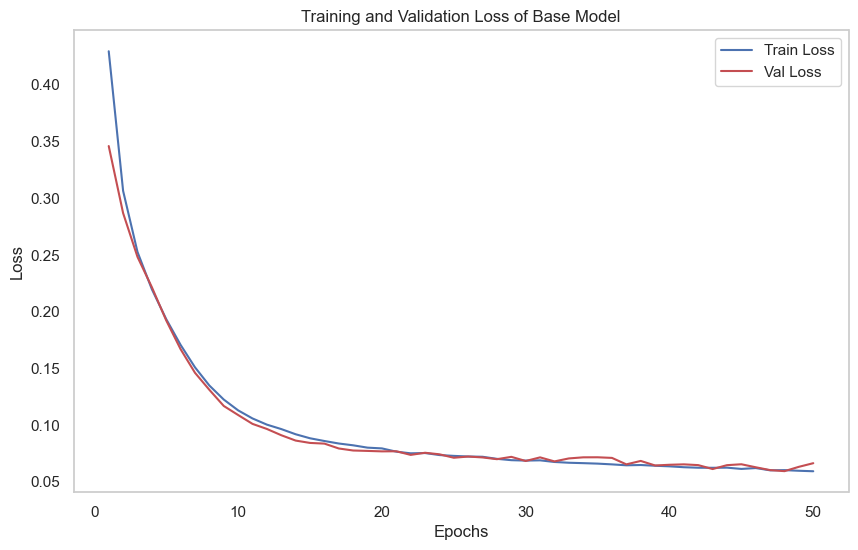

In [254]:
train_loss = loss.history['loss']
val_loss = loss.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.title('Training and Validation Loss of Base Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()

16/16 [==============================] - 0s 2ms/step


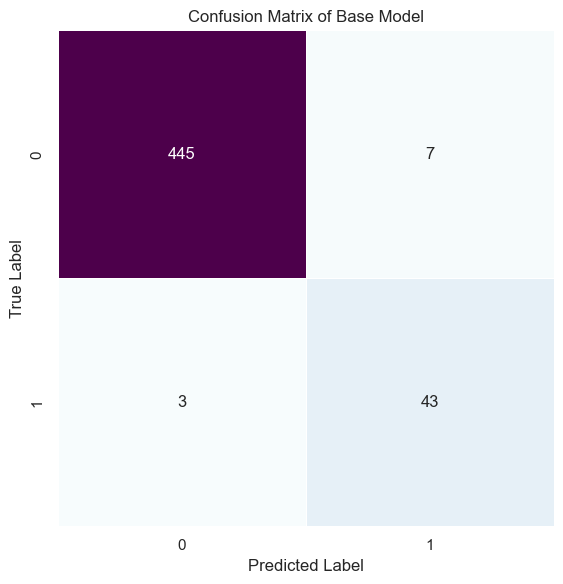

In [255]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred.round())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False, square=True, linewidths=0.5)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Base Model')

plt.tight_layout()
plt.show()

In [256]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
test_results = model2.evaluate(X_test, y_test)

print("Test Accuracy:", test_results[1])
print("Test Loss:", test_results[0])

y_pred = model2.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

16/16 [==============================] - 0s 13ms/step - loss: 0.0329 - accuracy: 0.9880 - auc_8: 0.9982
Test Accuracy: 0.9879518151283264
Test Loss: 0.03290853276848793
16/16 [==============================] - 0s 3ms/step
AUC Score: 0.998220469411312
Precision: 1.0
Recall: 0.8695652173913043
F1-score: 0.9302325581395349


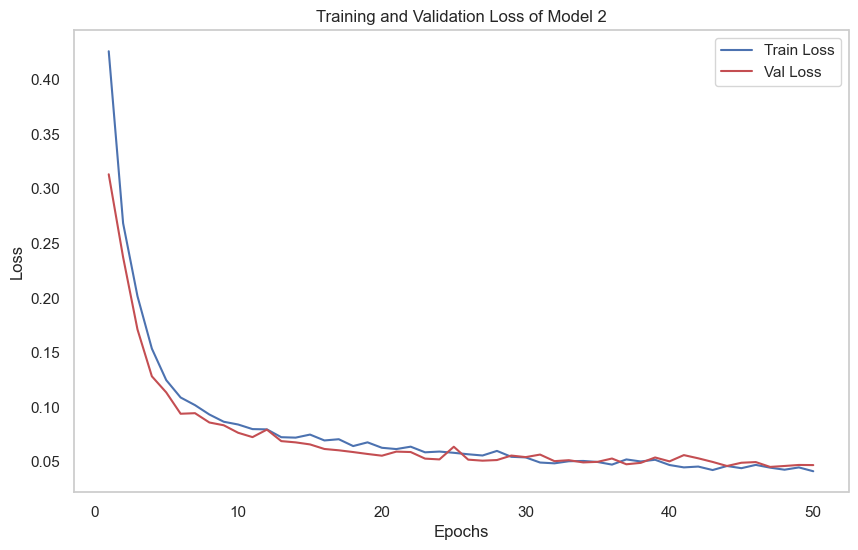

In [257]:
train_loss = loss2.history['loss']
val_loss = loss2.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.title('Training and Validation Loss of Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()

16/16 [==============================] - 0s 4ms/step


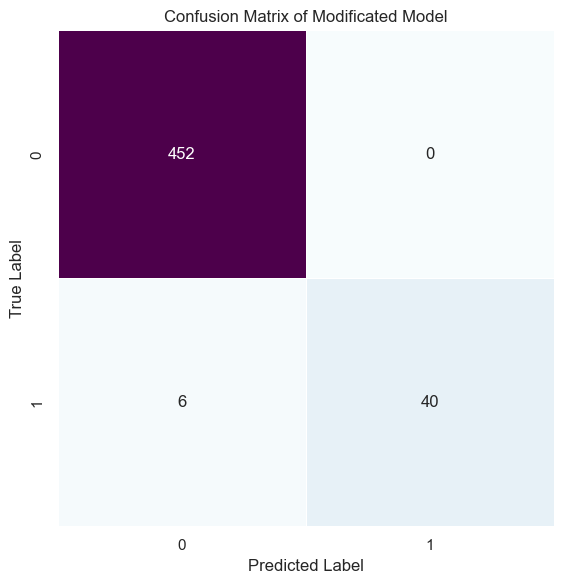

In [258]:
y_pred = model2.predict(X_test)

cm = confusion_matrix(y_test, y_pred.round())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False, square=True, linewidths=0.5)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Modificated Model')

plt.tight_layout()
plt.show()

In [259]:
from tabulate import tabulate
import pandas as pd
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

test_results_model = model.evaluate(X_test, y_test)
y_pred_model = model.predict(X_test)
auc_score_model = roc_auc_score(y_test, y_pred_model)
precision_model = precision_score(y_test, y_pred_model.round())
recall_model = recall_score(y_test, y_pred_model.round())
f1_model = f1_score(y_test, y_pred_model.round())

test_results_model2 = model2.evaluate(X_test, y_test)
y_pred_model2 = model2.predict(X_test)
auc_score_model2 = roc_auc_score(y_test, y_pred_model2)
precision_model2 = precision_score(y_test, y_pred_model2.round())
recall_model2 = recall_score(y_test, y_pred_model2.round())
f1_model2 = f1_score(y_test, y_pred_model2.round())

data = {
    "Metric": ["Accuracy", "Loss", "AUC Score", "Precision", "Recall", "F1-score"],
    "Model": [test_results_model[1], test_results_model[0], auc_score_model, precision_model, recall_model, f1_model],
    "Model 2": [test_results_model2[1], test_results_model2[0], auc_score_model2, precision_model2, recall_model2, f1_model2]
}

df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

print(table)


16/16 [==============================] - 0s 3ms/step
+-----------+----------------------+---------------------+
|  Metric   |        Model         |       Model 2       |
+-----------+----------------------+---------------------+
| Accuracy  |  0.9799196720123291  | 0.9879518151283264  |
|   Loss    | 0.054822180420160294 | 0.03290853276848793 |
| AUC Score |  0.9962004617160446  |  0.998220469411312  |
| Precision |         0.86         |         1.0         |
|  Recall   |  0.9347826086956522  | 0.8695652173913043  |
| F1-score  |  0.8958333333333334  | 0.9302325581395349  |
+-----------+----------------------+---------------------+



Dari hasil evaluasi, Model 2 menunjukkan performa yang lebih baik daripada Model 1 dalam kasus Loan Prediction.Dengan jumlah epochs yang sama yaitu sebanyak 50,mModel 2 memiliki nilai AUC yang lebih tinggi (0.9984) dibandingkan dengan Model 1 (0.9961), enandakkan bahwa Model 2 memiliki kemampuan yang lebih baik dalam memisahkan kelas positif dan negatif. Selain itu, Model 2 juga memiliki akurasi yang lebih tinggi (0.988) dan nilai loss yang lebih rendah (0.0326) daripada Model 1, menunjukkan bahwa Model 2 mampu mengklasifikasikan data dengan lebih baik secara keseluruhan dan memiliki tingkat error yang lebih rendah selama proses pelatihan. Namun, Model 2 memiliki nilai recall yang sedikit lebih rendah (0.8696) dan nilai precision yang lebih tinggi (1.0) dibandingkan dengan Model 1. Meskipun Model 2 memiliki kemampuan untuk memberikan prediksi positif dengan lebih akurat, perlu diingat bahwa Model 2 cenderung lebih rentan terhadap nilai False Negatif. Dalam kasus Loan Prediction, baik nilai False Positif maupun False Negatif memiliki dampak yang signifikan, sehingga perlu dilakukan penilaian yang cermat terhadap kedua metric ini. Dengan mempertimbangkan F1-score, Model 2 juga unggul dengan F1-score sebesar 0.9302 dibandingkan dengan Model 1 yang memiliki F1-score sebesar 0.8958, menunjukkan bahwa Model 2 adalah pilihan yang lebih baik dalam hal keseimbangan antara precision dan recall.. 

Kedua model dievaluasi dengan beberapa metric, termasuk AUC, accuracy, F1, precision, dan recall. AUC diprioritaskan sebagai tolak ukur utama karena adanya imbalance class pada label data, yang dapat membuat penggunaan accuracy menjadi misleading. Dalam kasus Loan Prediction, di mana klasifikasi antara klien yang mendapatkan pinjaman dan yang tidak dapat menjadi tidak seimbang, penting untuk mempertimbangkan AUC sebagai indikator kemampuan model dalam membedakan kedua kelas tanpa dipengaruhi oleh imbalance class. Selain itu, penting juga untuk memeriksa precision dan recall, serta keseimbangan antara keduanya melalui F1-score.


Untuk model yang dimodifikasi, keuntungan utamanya adalah memiliki kinerja yang lebih baik secara keseluruhan dengan nilai AUC, akurasi, dan loss yang lebih baik. Ini berarti model tersebut dapat memberikan prediksi dengan tingkat keakuratan yang lebih tinggi dan menghasilkan error yang lebih rendah selama proses pelatihan. Namun, kerugian dari Model 2 adalah memiliki nilai recall yang sedikit lebih rendah dibandingkan dengan Model 1, yang berarti model tersebut cenderung lebih rentan terhadap False Negatif. Dalam konteks Loan Prediction, di mana prediksi yang salah dapat memiliki dampak finansial yang signifikan, penting untuk mempertimbangkan keseimbangan antara precision dan recall agar dapat mengurangi risiko kesalahan prediksi yang merugikan.